## Introduction:
In this project, we will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries. 

**The main goal of the project** is to assess the effect of economic development on the level of life expectancy.

In [2]:
import pandas as pd  #Load the libraries we need
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
df = pd.read_csv('all_data.csv') #load data
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [4]:
df.columns = ['country','year','life_expectancy','gdp']
print(df.head())
print('Countries:',df.country.unique())
print('Years:',df.year.unique())

  country  year  life_expectancy           gdp
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10
Countries: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


The rich countries of the world tend to have a higher life expectancy. Let's check it out with the example of 6 countries. 

The object of the study was data for 2000 - 2015 of the countries: Chile, China, Germany, Mexico, United States of America and Zimbabwe. 

The measure of longevity is life expectancy at birth, and the measure of well-being is the value of GDP in US dollars.


Let's see how life expectancy and GDP change over time in these countries.

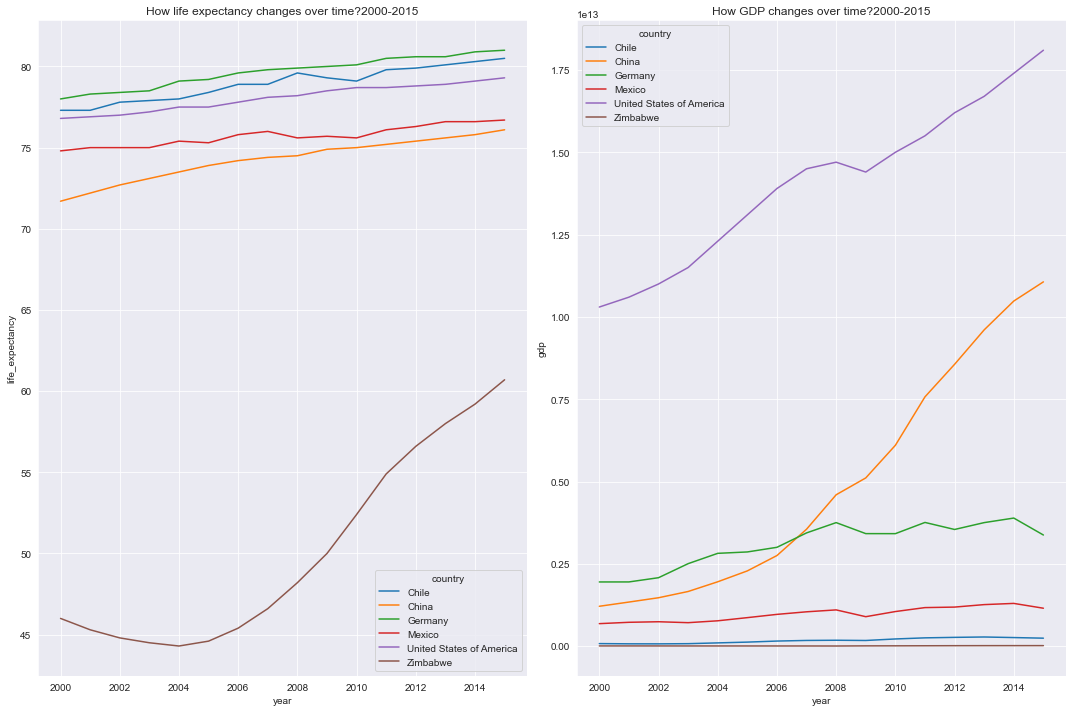

In [5]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
ax1 = sns.lineplot(data = df, x = 'year', y = 'life_expectancy', hue = 'country')
ax1.set(title = 'How life expectancy changes over time?2000-2015')
plt.subplot(1,2,2)
ax2 = sns.lineplot(data = df, x = 'year', y = 'gdp', hue = 'country')
ax2.set(title = 'How GDP changes over time?2000-2015')
plt.tight_layout()
plt.show()

As we can see from these two figures, both life expectancy and GDP are generally have an increasing trend.


It is worth noting life expectancy in Zimbabwe, where the line is located much lower than lines of other countries and has a decreasing appearance in the early 2000s.

Also, changes in the GDP lines of poor countries are not visible in the general graph. So let's build them separately to see their behavior.

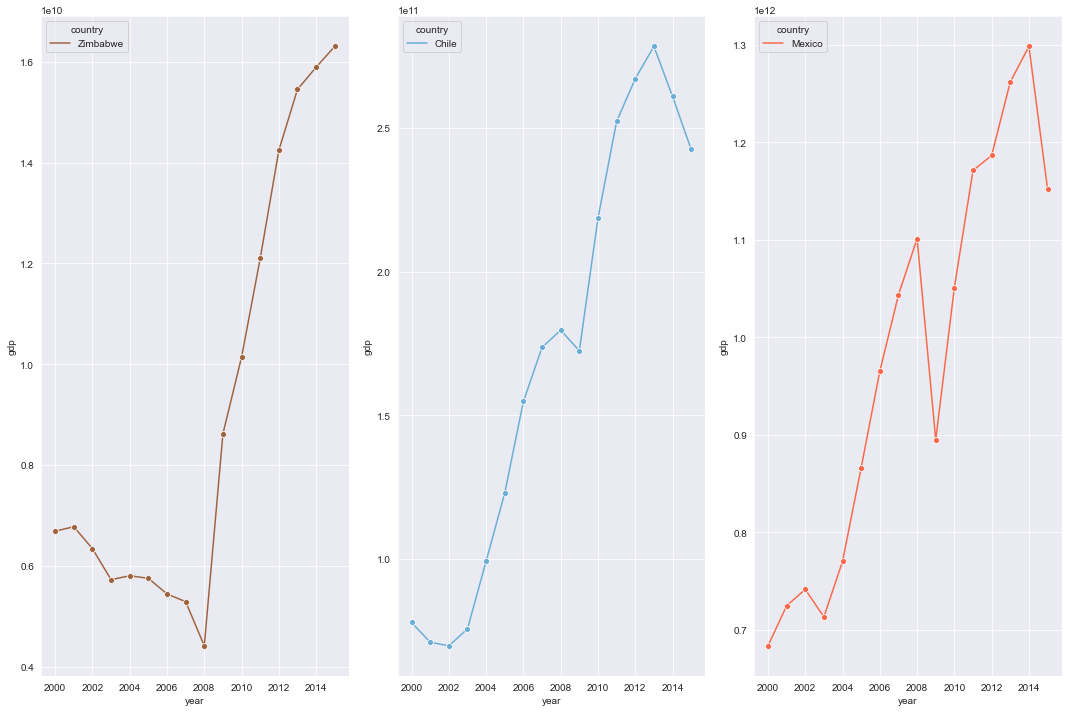

In [6]:
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
sns.lineplot(data = df[df.country == 'Zimbabwe'], x = 'year', y = 'gdp', hue = 'country', palette = 'copper',marker = 'o')
plt.subplot(1,3,2)
sns.lineplot(data = df[df.country == 'Chile'], x = 'year', y = 'gdp', hue = 'country', palette = 'Blues', marker = 'o')
plt.subplot(1,3,3)
sns.lineplot(data = df[df.country == 'Mexico'], x = 'year', y = 'gdp', hue = 'country', palette = 'Reds', marker = 'o')
plt.tight_layout()
plt.show()
               

To compare GDP growth in these countries, let us plot the distribution of GDP growth rates.

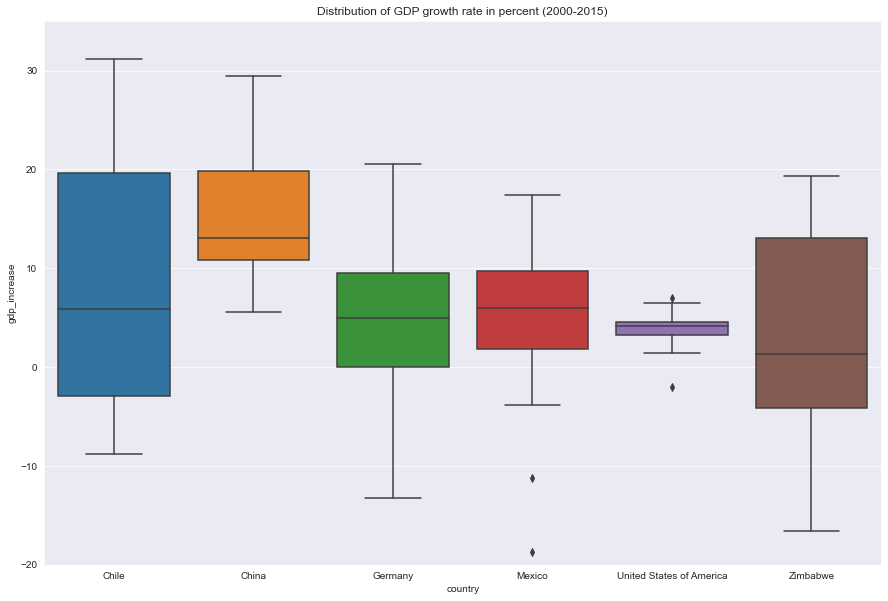

In [14]:
df['gdp_increase'] =  df.gdp.pct_change()*100 ## calculate GDP growth rate and add it to our data
df['gdp_increase'] = df.apply(lambda row: 'NaN' if row.year == 2000 else row.gdp_increase, axis = 1)
df['gdp_increase'] = df.gdp_increase.astype(float)
plt.figure(figsize = (15,10))
plt.ylim(-20, 35)
sns.boxplot(data = df[df.year != 2000], x = 'country', y = 'gdp_increase')
plt.title('Distribution of GDP growth rate in percent (2000-2015)')
plt.show()

From this vizualization we can see: 
- The United States has a stable GDP growth, the range of values is very small (the narrowest boxplot). 
- The boxplot that lies above all is China, they have the most intensive GDP growth of all the countries available. 
- And China does not have periods of recession like other countries. 
- On average, all countries have positive dynamics, GDP is growing.

In order to be able to correlate data from different countries, it is better to use GDP per capita for the analysis.

For this, I took data on the population in the countries for the required years. I used data from [The World Bank](https://data.worldbank.org/)

In [8]:
total_pop = pd.read_csv('total_population.csv')
print(total_pop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            260 non-null    float64
 5   1961            260 non-null    float64
 6   1962            260 non-null    float64
 7   1963            260 non-null    float64
 8   1964            260 non-null    float64
 9   1965            260 non-null    float64
 10  1966            260 non-null    float64
 11  1967            260 non-null    float64
 12  1968            260 non-null    float64
 13  1969            260 non-null    float64
 14  1970            260 non-null    float64
 15  1971            260 non-null    float64
 16  1972            260 non-null    float64
 17  1973            260 non-null    flo


The downloaded file contained data of the total population of 264 countries for the period 1960 - 2020. 

Having chosen the necessary countries and years, I combined the information and calculated the GDP per capita = GDP / total population.

In [9]:
new_pop = total_pop[['Country Name','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
df_pop = new_pop[(new_pop['Country Name'] =='Chile')|(new_pop['Country Name'] =='China')|(new_pop['Country Name'] =='Germany')|
        (new_pop['Country Name'] =='Mexico')|(new_pop['Country Name'] =='United States of America')|(new_pop['Country Name'] =='Zimbabwe')]
df_pop = df_pop.melt(id_vars = 'Country Name', value_vars = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])
df_pop.columns = ['country','year','population']
df_pop['year'] = df_pop.year.astype(int)
df_add = df.merge(df_pop, how = 'left')
df_add['gdp_per_capita'] = (df_add.gdp/df_add.population)
df_add

,country,year,life_expectancy,gdp,gdp_increase,population,gdp_per_capita
0,Chile,2000,77.3,7.786093e+10,NaN,15342353.0,5074.901624
1,Chile,2001,77.3,7.097992e+10,-8.837562,15516113.0,4574.594421
2,Chile,2002,77.8,6.973681e+10,-1.751358,15684409.0,4446.250505
3,Chile,2003,77.9,7.564346e+10,8.469915,15849652.0,4772.562820
4,Chile,2004,78.0,9.921039e+10,31.155282,16014971.0,6194.853107
...,...,...,...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10,19.292231,12894316.0,938.277823
92,Zimbabwe,2012,56.6,1.424249e+10,17.721604,13115131.0,1085.958673
93,Zimbabwe,2013,58.0,1.545177e+10,8.490639,13350356.0,1157.404990
94,Zimbabwe,2014,59.2,1.589105e+10,2.842915,13586681.0,1169.604941


Let's construct the distribution of life expectancy and GDP per capita. 

The distribution of life expectancy is left skewed, most of the values are on the left-hand side.

The distribution of GDP per capita, on the contrary, is right skewed, most of the values are on the right side.

The average LE: 72.79
The average GDP per capita: 17910.76
The Standard Deviation LE: 10.62
The Standard Deviation GDP per capita: 18156.33


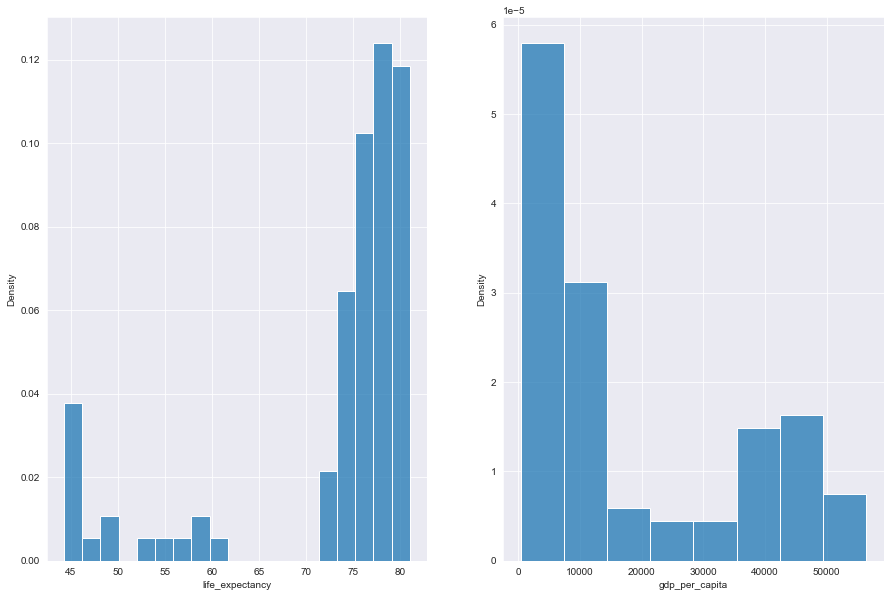

In [10]:
print('The average LE: '+str(round(np.mean(df_add.life_expectancy),2)))
print('The average GDP per capita: '+str(round(np.mean(df_add.gdp_per_capita),2)))
print('The Standard Deviation LE: '+str(round(np.std(df_add.life_expectancy),2)))
print('The Standard Deviation GDP per capita: '+str(round(np.std(df_add.gdp_per_capita),2)))
plt.figure(figsize = (15,10))
ax1 = plt.subplot(1,2,1)
sns.histplot(data = df_add, x = 'life_expectancy', kde = False, stat = 'density')
ax2 = plt.subplot(1,2,2)
sns.histplot(data = df_add, x = 'gdp_per_capita', kde = False, stat = 'density')
plt.show()

Now let's look at the distribution of our values by country.

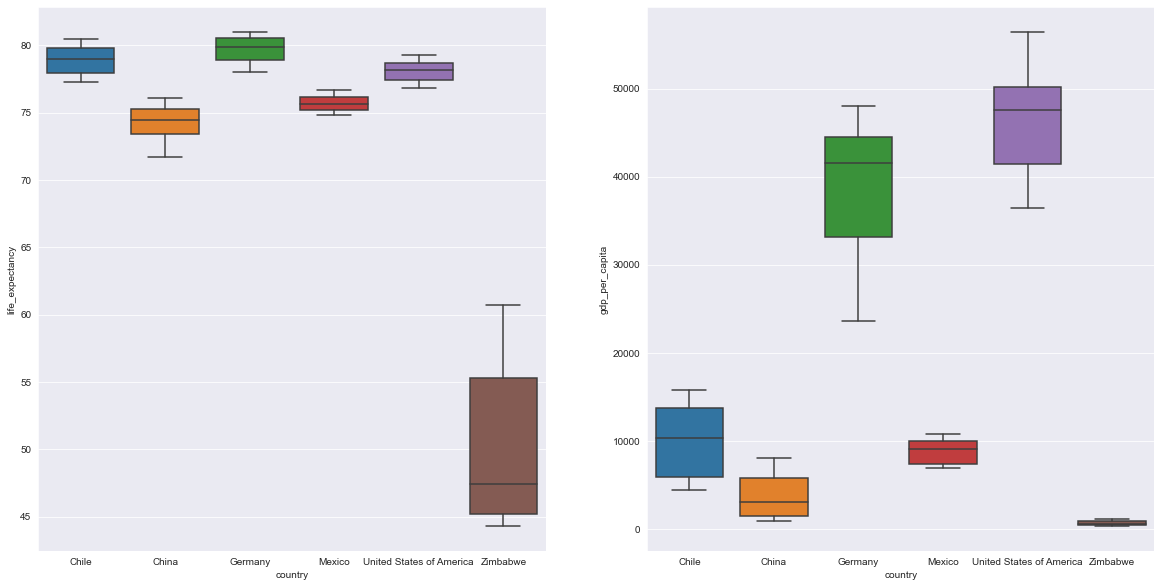

In [11]:
plt.figure(figsize = (20,10))
ax1 = plt.subplot(1,2,1)
sns.boxplot(data = df_add, x = 'country', y = 'life_expectancy')
ax2 = plt.subplot(1,2,2)
sns.boxplot(data = df_add, x = 'country', y = 'gdp_per_capita')
plt.show()

It is worth paying attention to China. If you look at the graph of China's GDP, you can see that China has the most intensive growth, and since 2007, GDP in China became higher than in Germany.

BUT! The boxplot of GDP per capita is below all available countries, with the exception of Zimbabwe.

Now let's try to analyze the dependence of GDP per capita and life expectancy. For this we use a scatter plot. On the left graph we see groups of dots colored for different countries, on the right for different years.


The location of the points is very similar to the logarithm, so we find an approximate line in the form y = A * lnx + B.

equation: y = 5.817552181343731 * lnx + 20.541650392887288


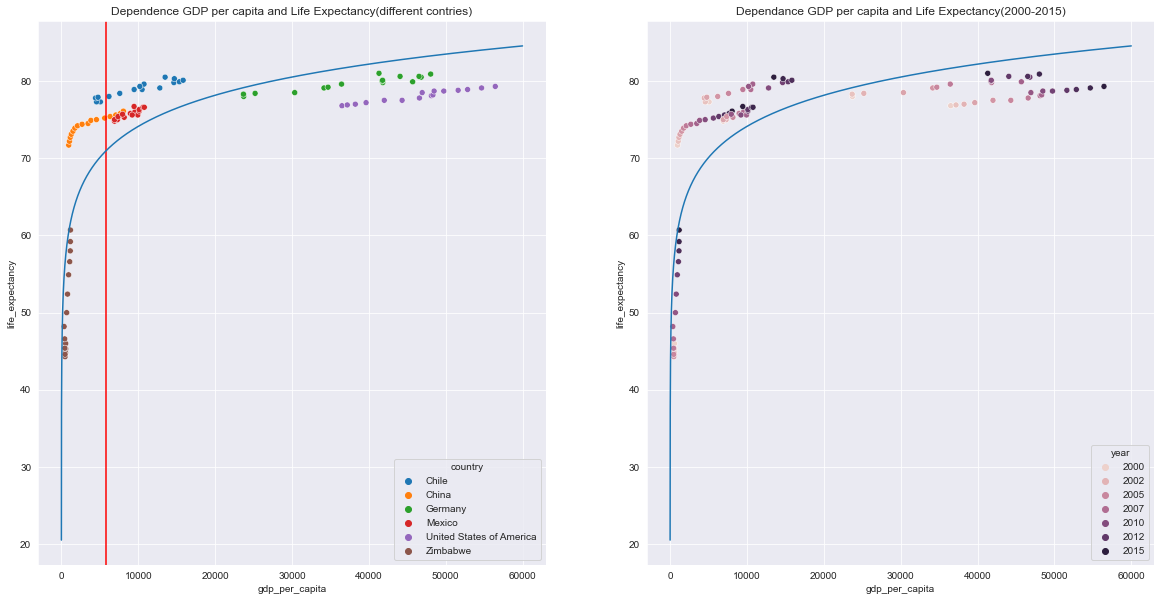

In [12]:
x = df_add.gdp_per_capita
y = df_add.life_expectancy
coef = np.polyfit(np.log(x), y, 1)
print('equation: y = '+ str(coef[0])+' * lnx + '+str(coef[1]))
plt.figure(figsize = (20,10))
ax1 = plt.subplot(1,2,1)
sns.scatterplot(data = df_add, x = 'gdp_per_capita', y = 'life_expectancy', hue = 'country')
ax1.set(title = 'Dependence GDP per capita and Life Expectancy(different contries)')
x = np.arange(1, 60000, 1)
ax1.axvline(coef[0]*1000,c='red')
#plt.axhline(72.79)
y = coef[0]*np.log(x)+coef[1]
ax1.plot(x,y)
ax2 = plt.subplot(1,2,2)
sns.scatterplot(data = df_add, x = 'gdp_per_capita', y = 'life_expectancy', hue = 'year')
ax2.set(title = 'Dependance GDP per capita and Life Expectancy(2000-2015)')
ax2.plot(x,y)
plt.show()

- Each country has its place on the logarithm line. Over time, the points of each country seem to move along this line. 
- These graphs show that people who born in richer countries can, on average, expect to live longer than those who born in poor countries. 
- However, the relationship between GDP per capita and life expectancy is leveled. 

With low GDP per capita, further increases in income are associated with significant increases in life expectancy(for example Zimbabwe). 

But in rich countries, an increase in GDP per capita has little effect on life expectancy(for example USA and Germany).

- The red line divides the logarithm into two parts. In the first, an increase in GDP per capita by 1000 dollars leads to an increase in life expectancy by more than a year, after the red line there is a deceleration (an increase in GDP per capita by 1000 dollars leads to an increase in life expectancy by less than a year).

## Conclusions:
- In this project, we examined how life expectancy and GDP behaved in six countries during the period 2000-2015.
- Life expectancy has increased in all countries, especially in Zimbabwe.
- GDP has also increased. The most intensive growth is in China.
- We also tried to assess the impact of economic development on life expectancy. For this, we used GDP per capita, because this is macroeconomic indicator that determines the level of economic development of the country and also helps to compare different countries. The data was taken from [The World Bank](https://data.worldbank.org/)
- The distribution of life expectancy is left skewed - in 5 out of 6 countries under consideration life expectancy ranges from 73 to 83.
- The distribution of GDP per capita is right skewed - only two countries have a GDP per capita over $ 20,000.
- Relationship between life expectancy and GDP per capita - logarithmic function. With low GDP per capita further increases in income are associated with significant increases in life expectancy. In rich countries an increase in GDP per capita has little effect on life expectancy.

## Further research:
- In my work, I show that the dependence of GDP per capita and life expectancy obeys a logarithmic law. 
In the future, I would like to check whether this is the case for other countries. 
Are there countries that do not obey this law and why?
- Also find the level of GDP per capita, after which the slowdown in the growth of life expectancy begins (for a certain country).
I think it would be useful for countries with low life expectancy, so that they try to reach this level.